In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegress
from sklearn.metrics import ConfusionMatrixDisplay
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path='/content/gdrive/My Drive/Used Car Price Prediction/used_cars.csv'
df=pd.read_csv(path)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
print('model:')
print(df.isnull().sum())

model:
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()
df.shape

(3269, 12)

In [ ]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [ ]:
df.tail()
df.duplicated()

,0
0,False
1,False
3,False
6,False
7,False
...,...
4003,False
4004,False
4005,False
4007,False


In [ ]:
df.head(4)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"


In [ ]:
#missing values with 0
df.fillna(0)
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
11,Aston,Martin DBS Superleggera,2019,"22,770 mi.",Gasoline,715.0HP 5.2L 12 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,"$184,606"
12,Toyota,Supra 3.0 Premium,2021,"12,500 mi.",Gasoline,382.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Yellow,Black,None reported,Yes,"$53,500"
13,Lincoln,Aviator Reserve AWD,2022,"18,196 mi.",Gasoline,400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Brown,None reported,Yes,"$62,000"
15,Land,Rover LR4 HSE,2013,"79,800 mi.",Gasoline,375.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,"$29,990"


In [ ]:
import pandas as pd

# Assuming the column is actually named 'engine' and not 'Engine'
engine = df['engine']

# Ensure the 'engine' column is of type string before using .str
engine = engine.astype(str)  # Convert to string type

# Extract numeric part using regex
engine = engine.str.extract(r'(\d+\.?\d*)', expand=False) # Extracts the first numeric part
engine = pd.to_numeric(engine, errors='coerce') # Convert to numeric, handle errors with NaN
engine = engine.astype(float) # Convert to float (since you might have decimals)
df['engine'] = engine # Assign back to the 'engine' column
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0,A/T,Green,Green,None reported,Yes,"$7,300"


In [ ]:
#printing specific column
df['transmission']

,transmission
0,6-Speed A/T
1,8-Speed Automatic
3,7-Speed A/T
6,6-Speed A/T
7,A/T
...,...
4003,A/T
4004,8-Speed Automatic with Auto-Shift
4005,Transmission w/Dual Shift Mode
4007,A/T


In [ ]:
#describe function
df.describe()

,model_year,engine
count,3269.000000,3225.000000
mean,2014.601407,301.486512
std,6.152181,137.959273
min,1974.000000,1.200000
25%,2011.000000,225.000000
50%,2016.000000,301.000000
75%,2019.000000,389.000000
max,2024.000000,797.000000


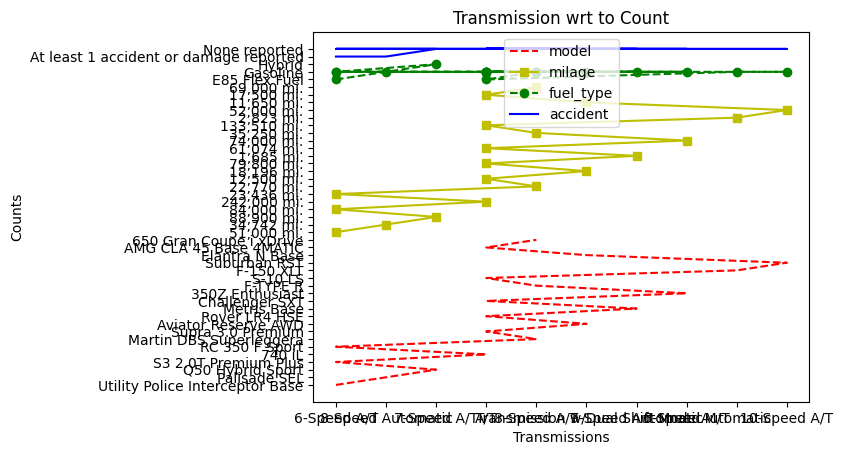

In [ ]:
d=df.head(20)
y=d.transmission
plt.plot(y,d.model,'r--')
plt.plot(y,d.milage,'ys-')
plt.plot(y,d.fuel_type,'go--')
plt.plot(y,d.accident,'b-')
plt.legend(labels=['model','milage','fuel_type','accident'],loc='upper center')
plt.title('Transmission wrt to Count')
plt.xlabel('Transmissions')
plt.ylabel('Counts')
plt.show()

([<matplotlib.patches.Wedge at 0x7ecca07f5ff0>,
 [Text(-0.17207795223283848, 1.086457168210212, 'A/T'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '6-Speed A/T'),
  Text(-0.6465636608734331, -0.8899187785623722, '8-Speed A/T'),
  Text(0.1720780793846638, -1.086457148071329, 'Transmission w/Dual Shift Mode'),
  Text(0.6465639212490593, -0.8899185893884004, '8-Speed Automatic'),
  Text(0.8899188012632436, -0.6465636296283541, '7-Speed A/T'),
  Text(1.0461622260061638, -0.3399185150559298, '9-Speed Automatic'),
  Text(1.0999999999999832, 1.931051857055056e-07, '6-Speed M/T'),
  Text(1.0461621066605937, 0.3399188823638205, 'Automatic'),
  Text(0.8899185742544796, 0.6465639420791067, '10-Speed A/T')])

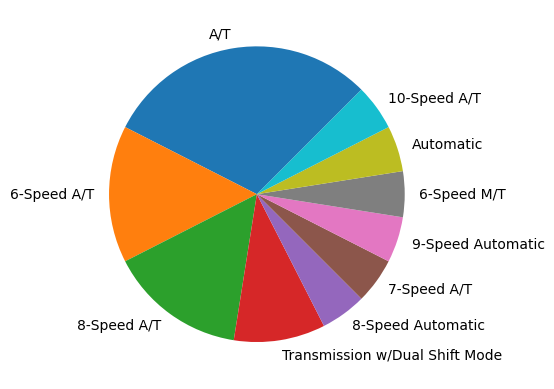

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Get the value counts for each transmission type
transmission_counts = d['transmission'].value_counts()

# Use the index (transmission types) as labels and values (counts) for the pie chart
plt.pie(transmission_counts.values, labels=transmission_counts.index, startangle=45)



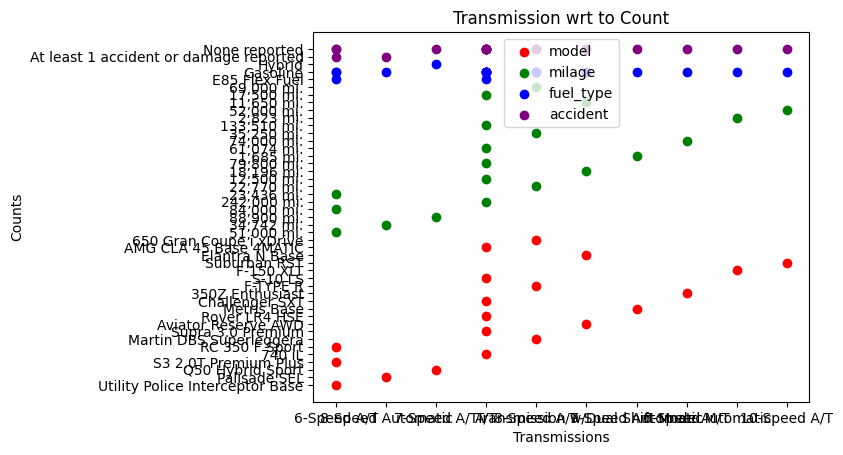

In [ ]:
plt.scatter(y,d.model,color='red')
plt.scatter(y,d.milage,color='green')
plt.scatter(y,d.fuel_type,color='blue')
plt.scatter(y,d.accident,color='purple')
plt.legend(labels=['model', 'milage', 'fuel_type', 'accident'], loc='upper center')
plt.title('Transmission wrt to Count')
plt.xlabel('Transmissions')
plt.ylabel('Counts')
plt.show()

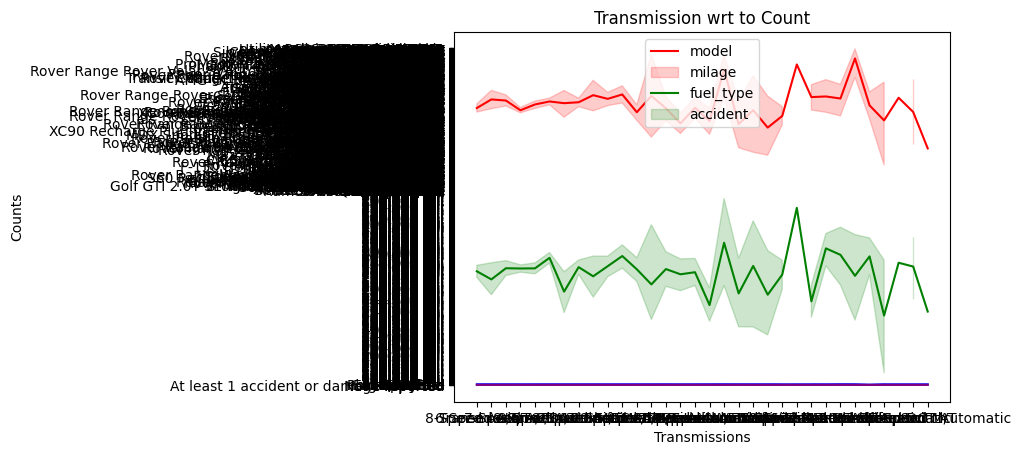

In [ ]:
# Now you can proceed with your line plots
sns.lineplot(x='transmission', y='model', color='red', data=df) # Change 'Transmission' to 'transmission'
sns.lineplot(x='transmission', y='milage', color='green', data=df) # Change 'Transmission' to 'transmission'
sns.lineplot(x='transmission', y='fuel_type', color='blue', data=df) # Change 'Transmission' to 'transmission'
sns.lineplot(x='transmission', y='accident', color='purple', data=df) # Change 'Transmission' to 'transmission'
plt.legend(labels=['model', 'milage', 'fuel_type', 'accident'], loc='upper center')
plt.title('Transmission wrt to Count')
plt.xlabel('Transmissions')
plt.ylabel('Counts')
plt.show()

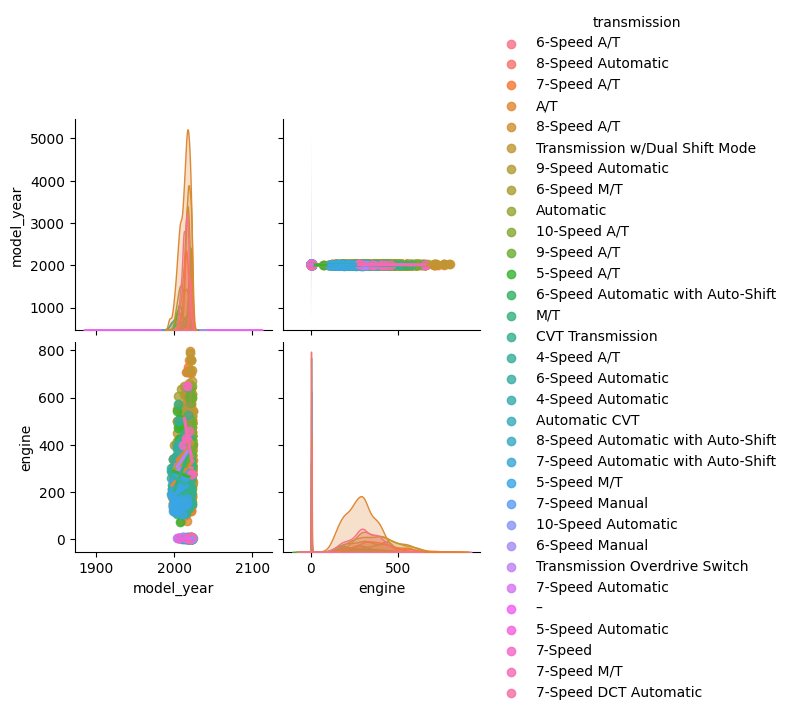

In [ ]:
sns.pairplot(df, hue='transmission', diag_kind='kde', kind='reg', palette='husl')  # Change 'Transmission' to 'transmission'
#pl.savefig('a.jpg')
plt.show()

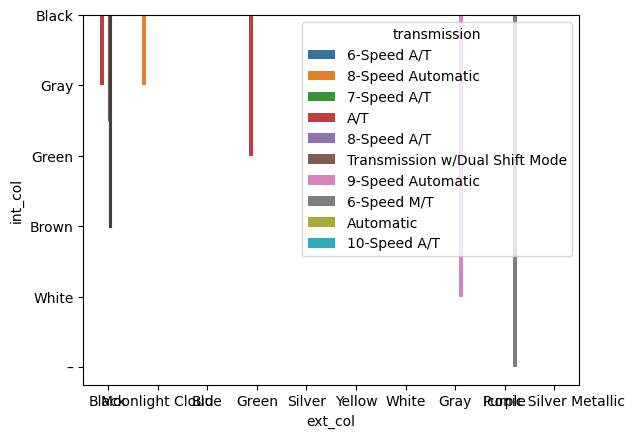

In [ ]:
sns.barplot(x='ext_col', y='int_col', hue='transmission', data=d)  # Changed 'Transmission' to 'transmission'
plt.show()

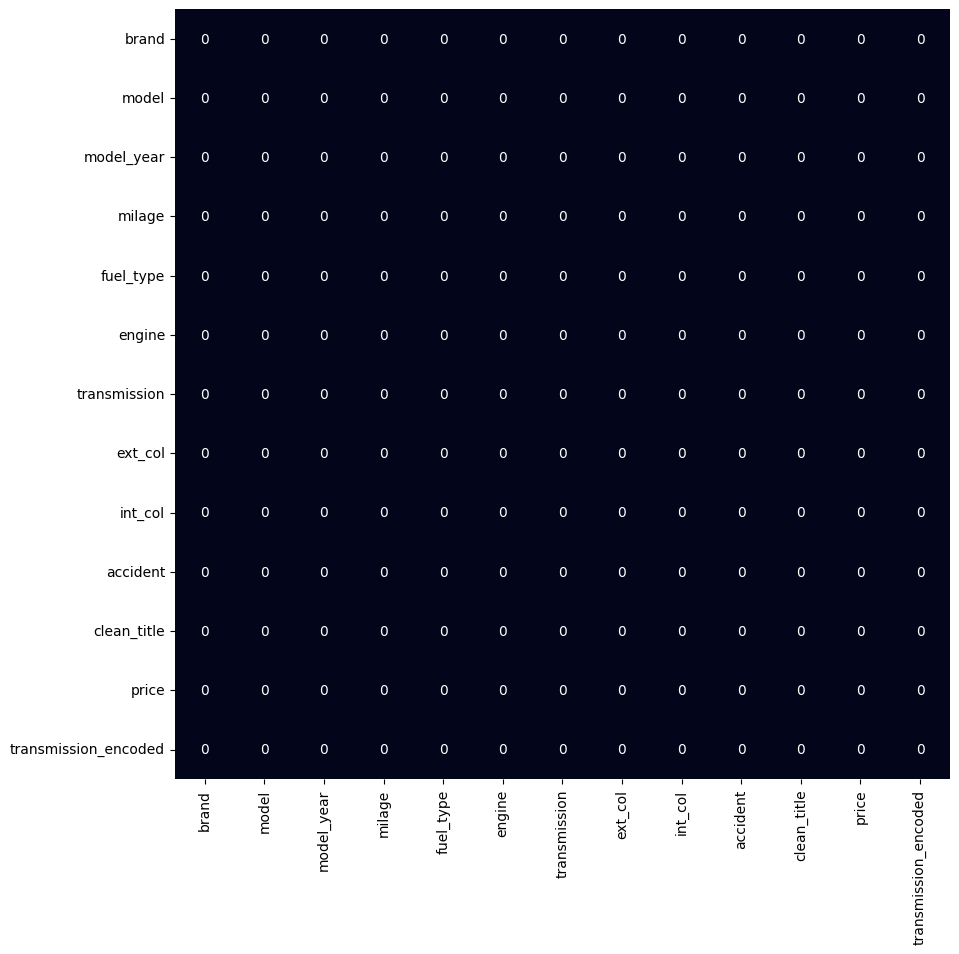

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.5, annot=True, cbar=False)
plt.show()

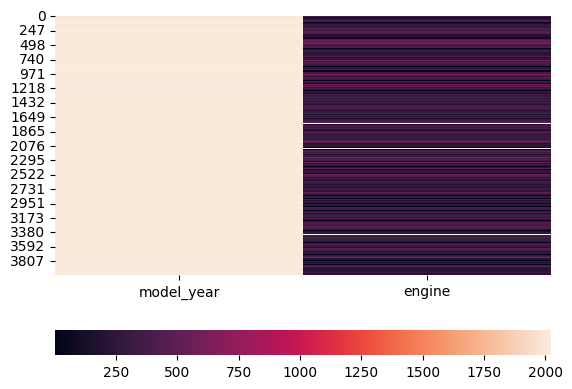

In [ ]:
# 1. Select only numerical columns for the heatmap:
numerical_d = df.select_dtypes(include=['number'])

# 2. Generate the heatmap using the numerical data:
sns.heatmap(data=numerical_d, cbar_kws={'orientation': 'horizontal'}) # Pass 'orient' within 'cbar_kws', Changed 'numerical_df' to 'numerical_d'
plt.show()

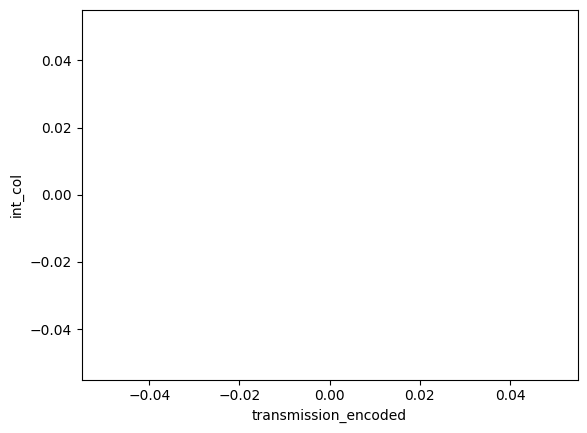

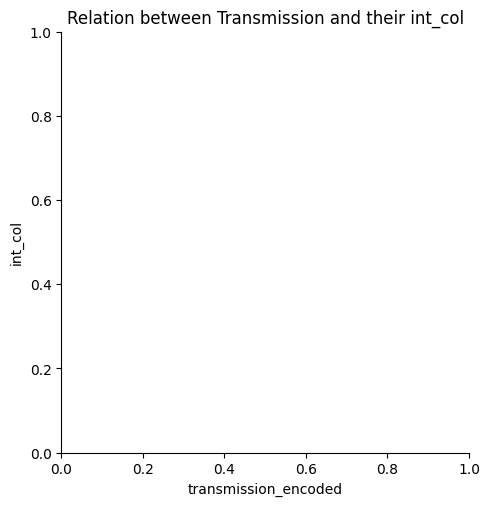

In [ ]:
#Create a new column 'transmission_encoded' by encoding the 'transmission' column
# Assuming 'transmission' column exists and you want to encode it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['transmission_encoded'] = le.fit_transform(df['transmission'])

#Convert 'int_col' to numeric types:
df['int_col'] = pd.to_numeric(df['int_col'], errors='coerce')

#Drop rows with NaN values after conversion:
df = df.dropna(subset=['transmission_encoded', 'int_col'])

#Now use the encoded column for the regplot:
sns.regplot(x='transmission_encoded', y='int_col', data=df)
sns.lmplot(x='transmission_encoded', y='int_col', data=df)
plt.title("Relation between Transmission and their int_col")
plt.show()

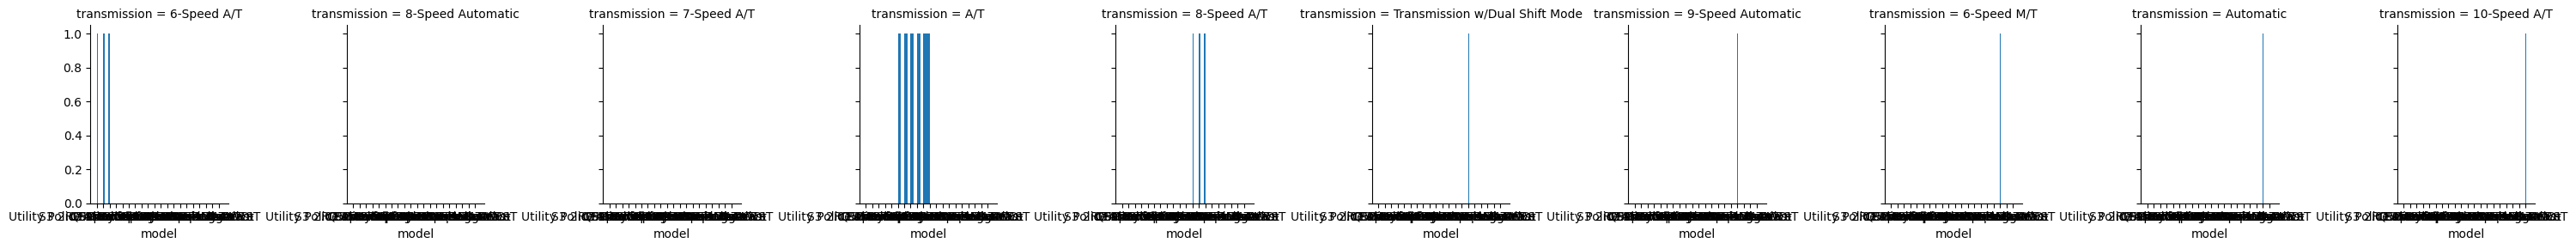

In [ ]:
g = sns.FacetGrid(d, col='transmission')  # Changed 'Transmssion' to 'transmission'
g.map(plt.hist, 'model')
plt.show()

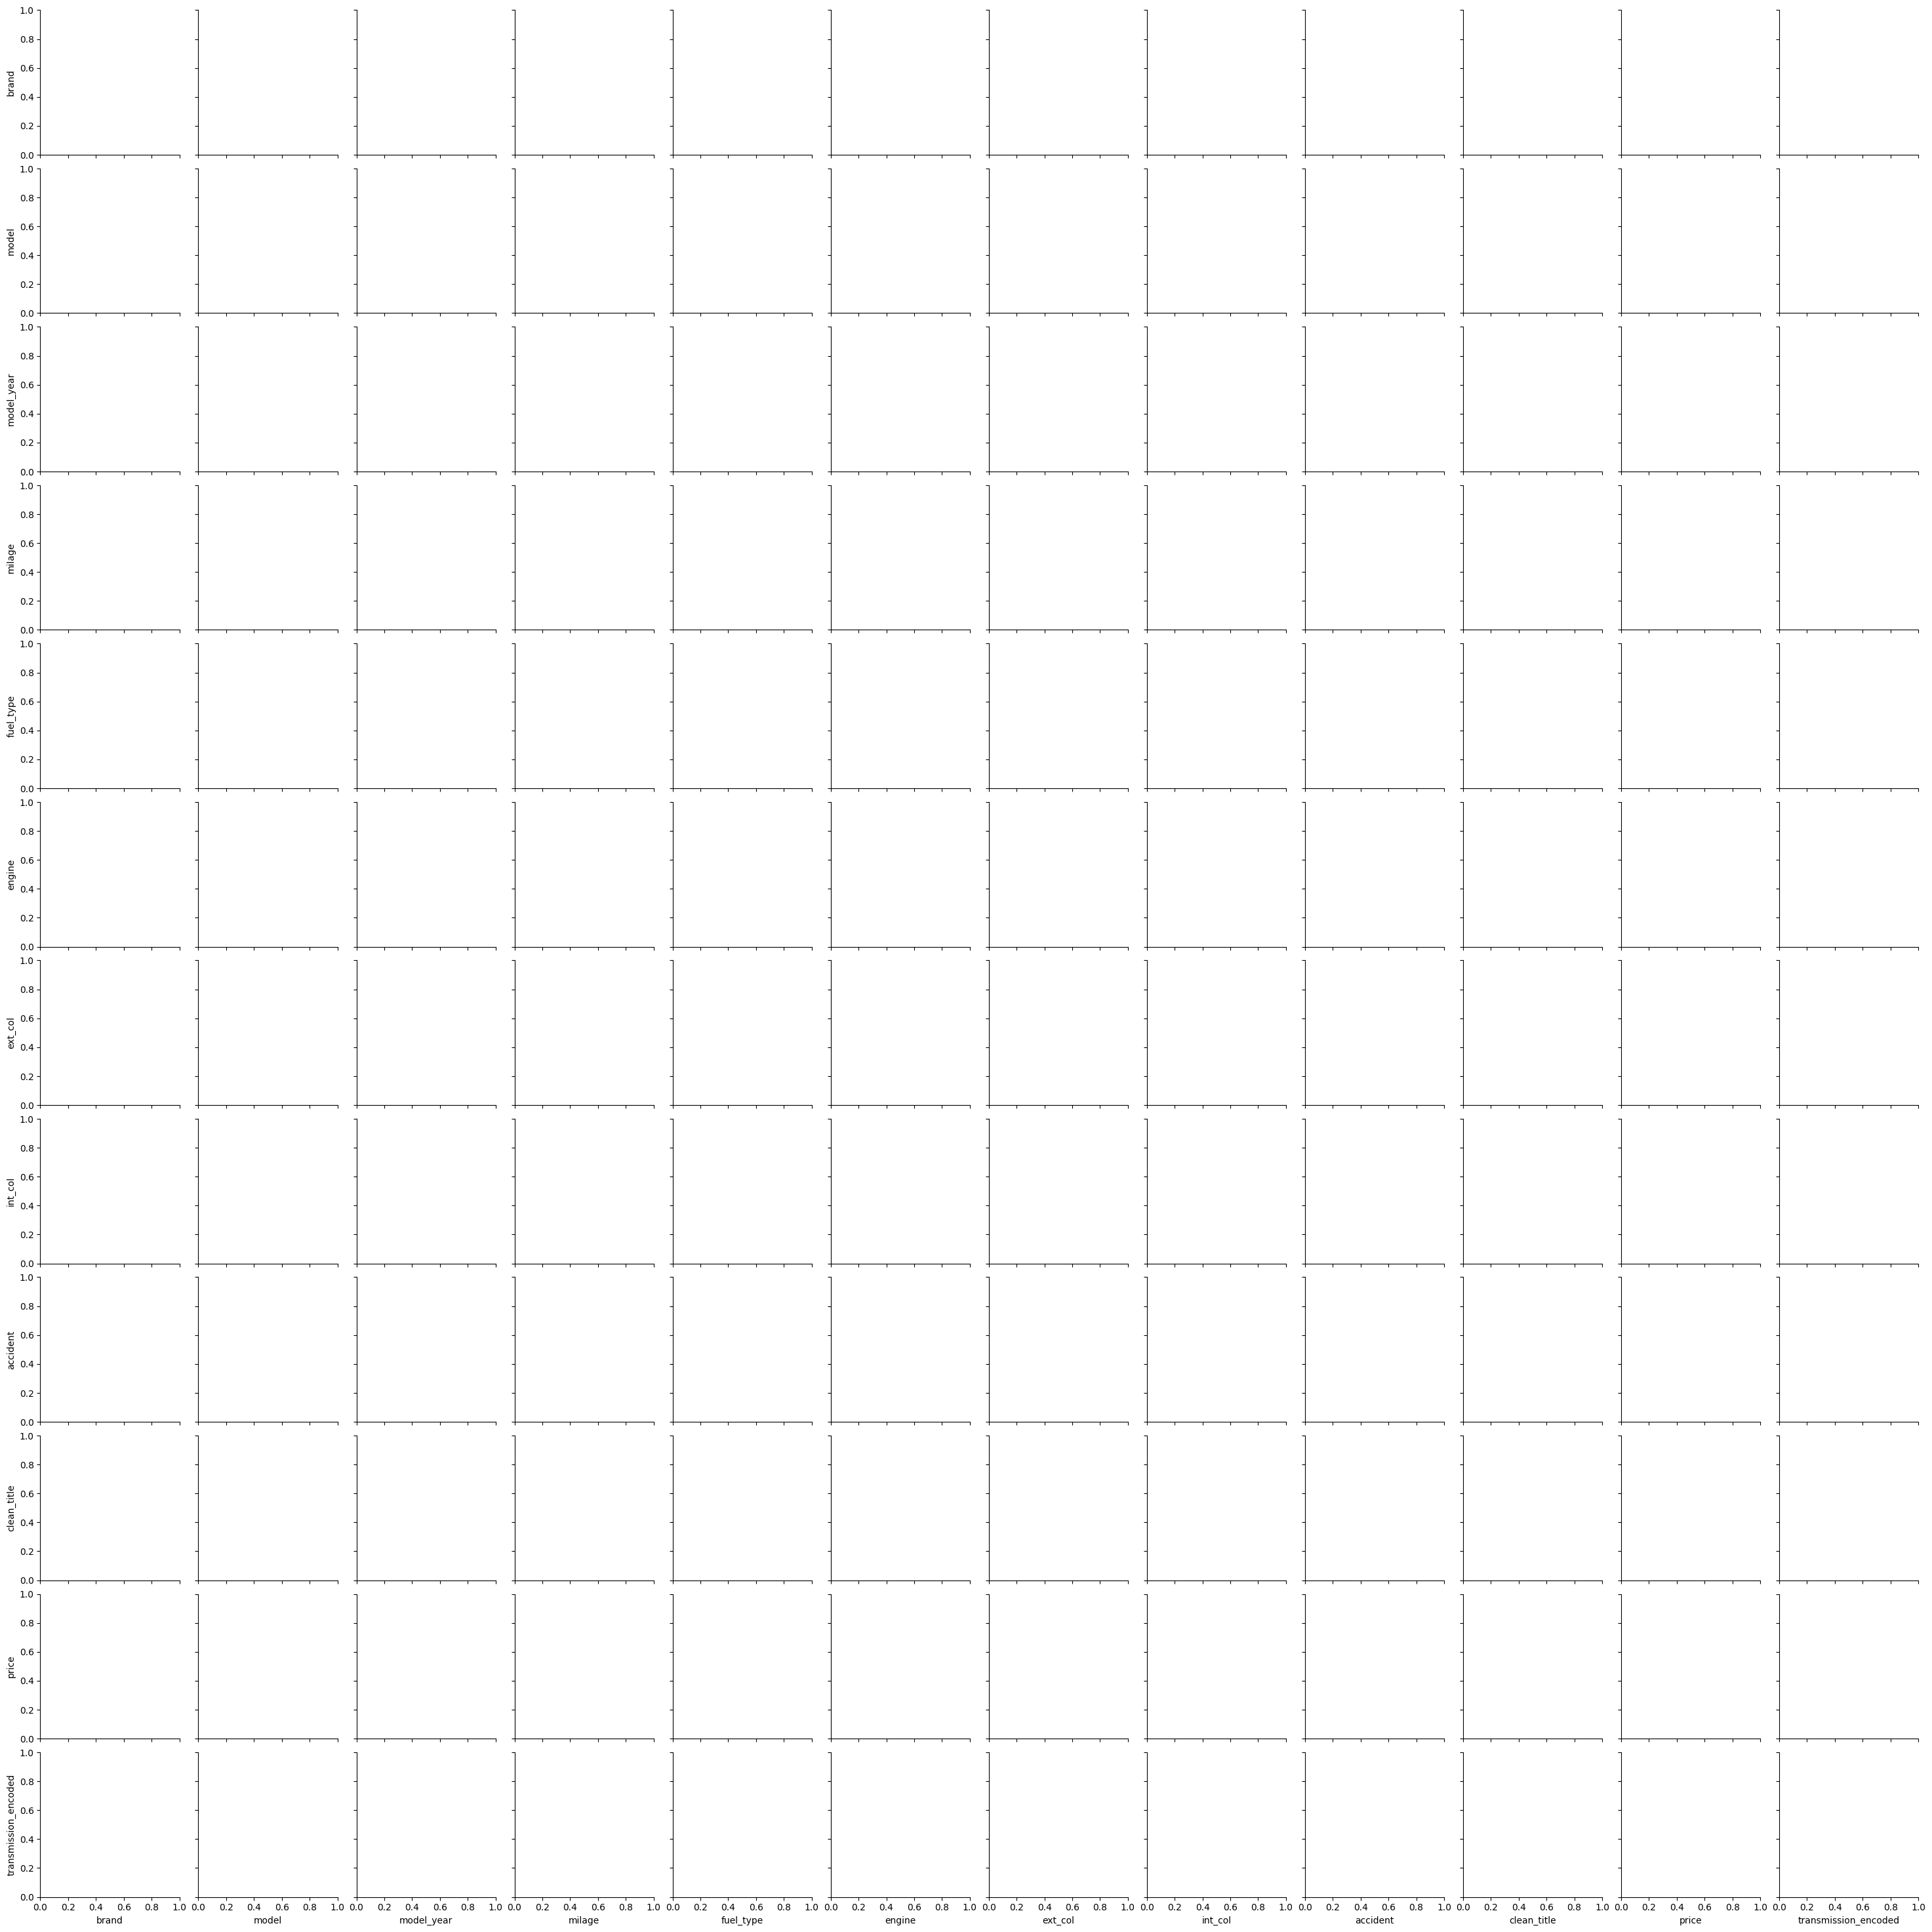

In [ ]:
g = sns.PairGrid(df, hue='transmission')  # Changed 'Transmission' to 'transmission'
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

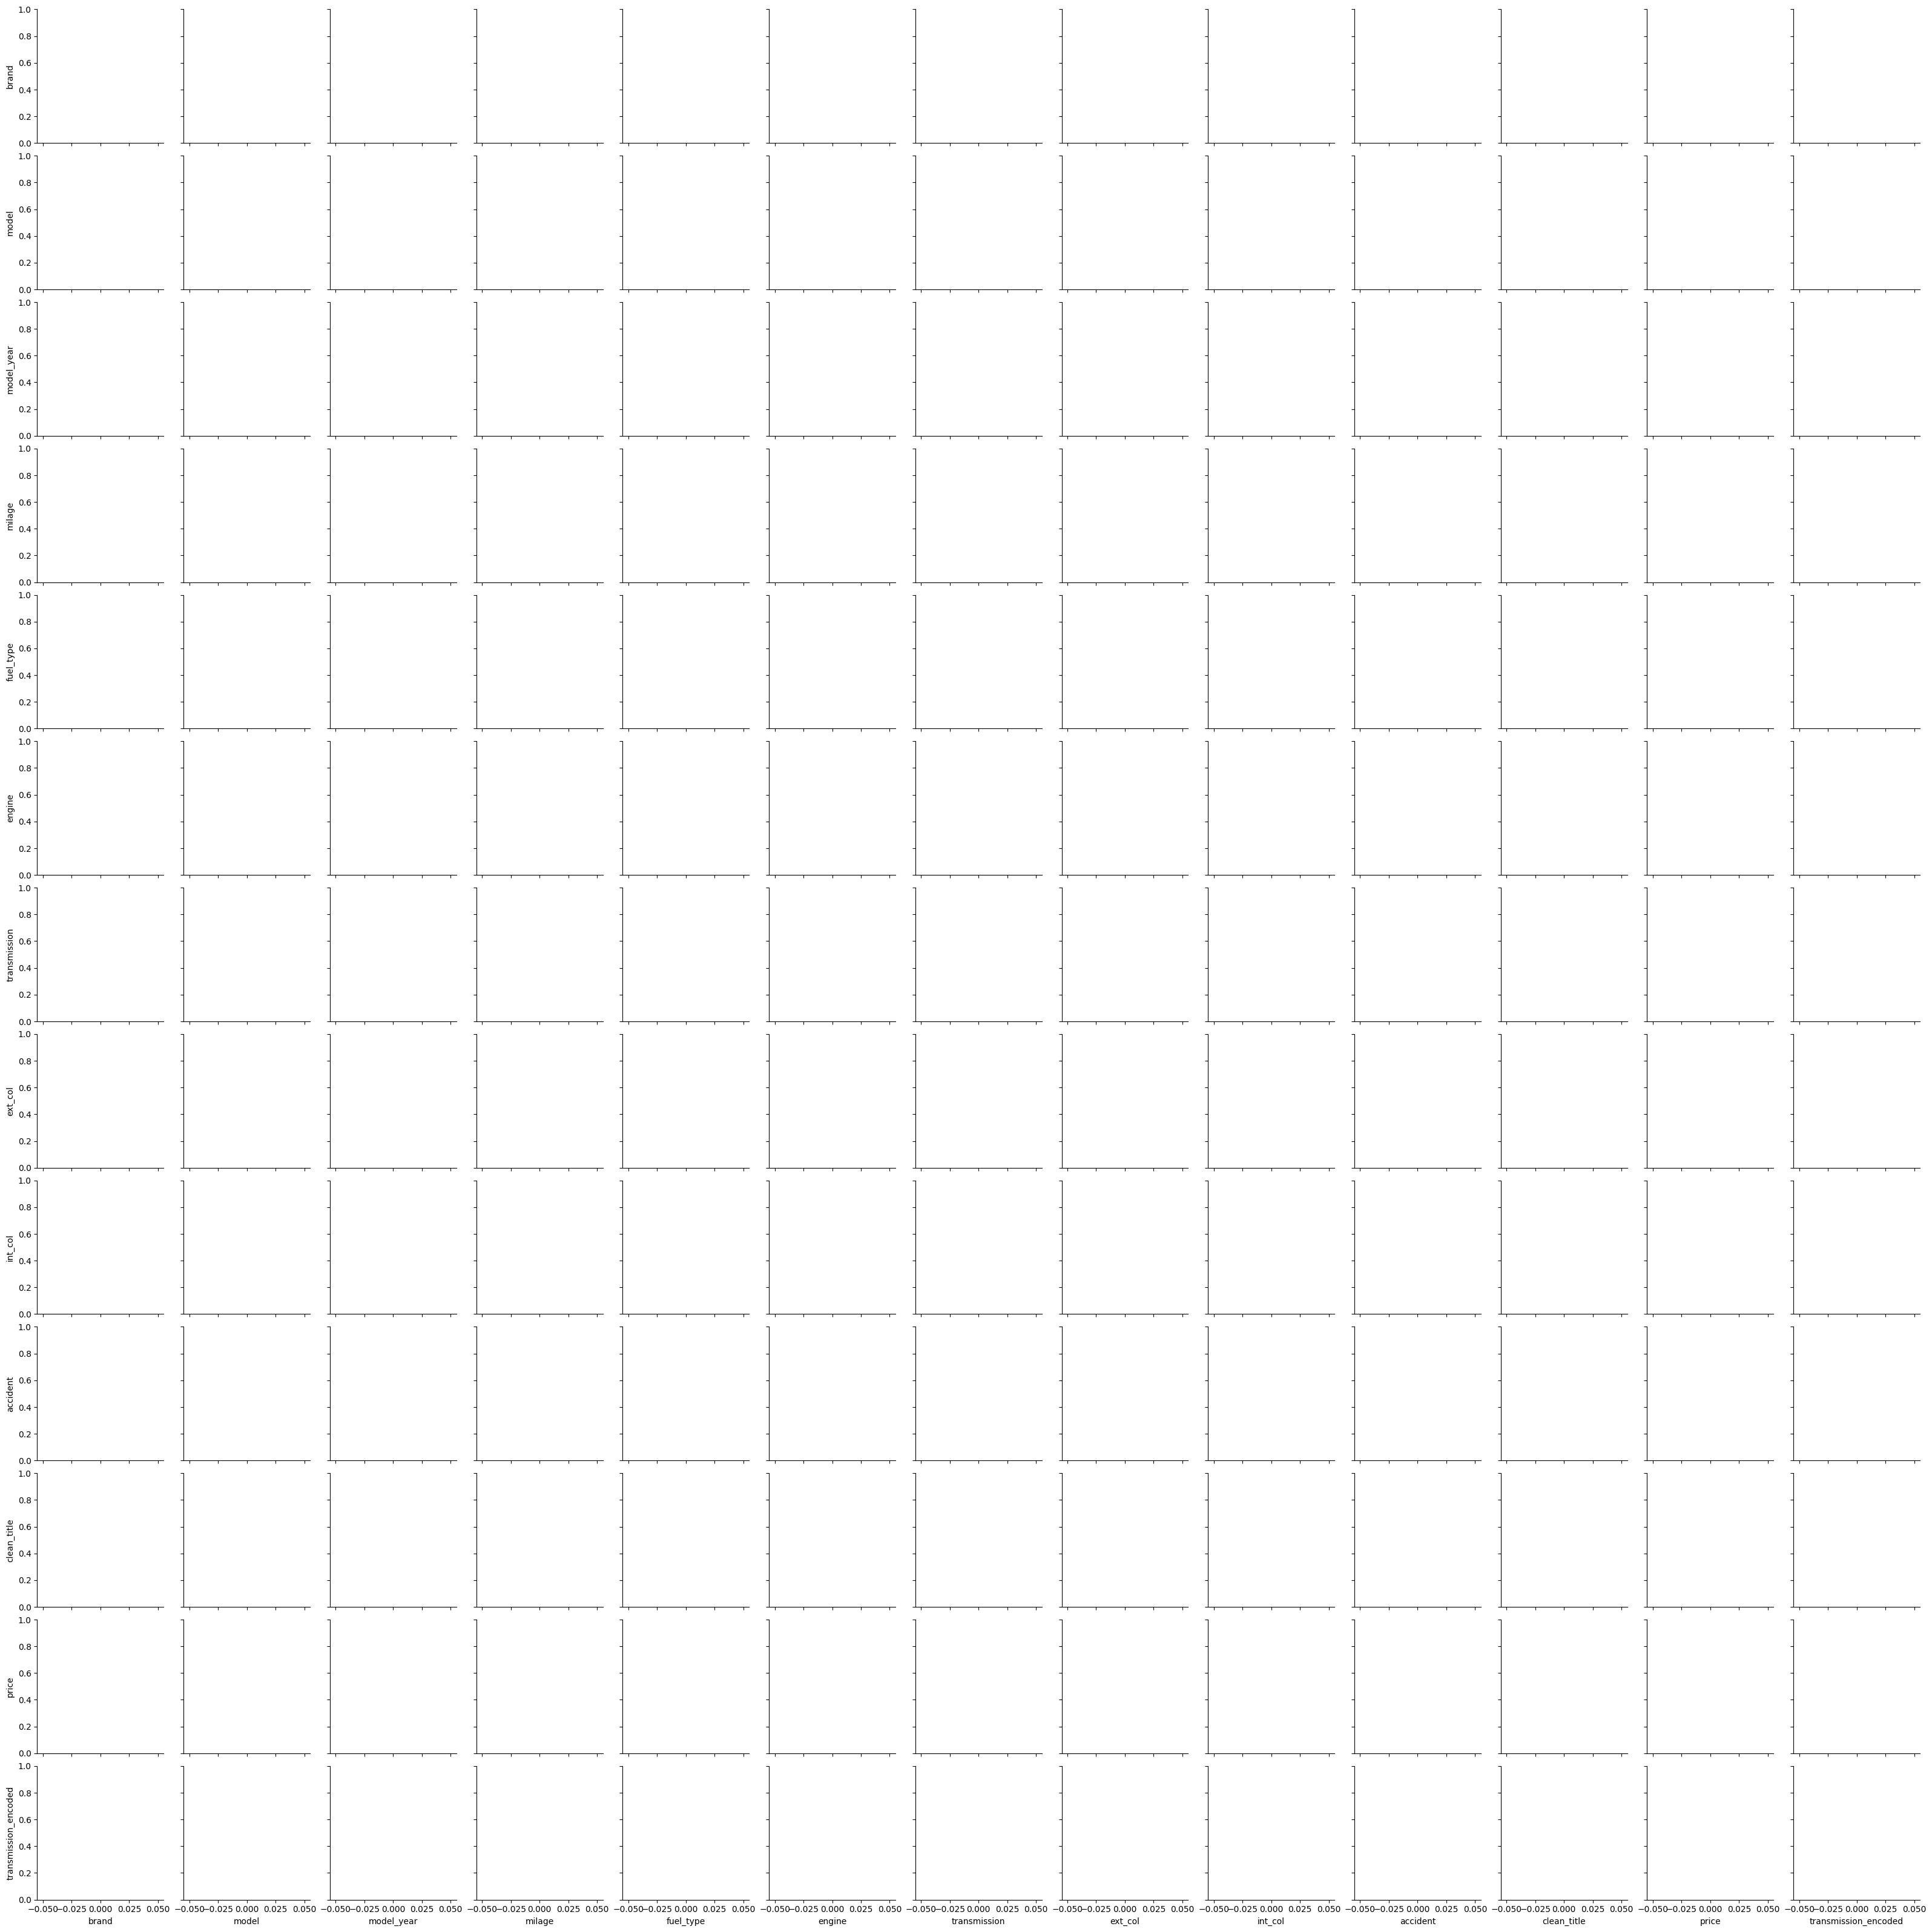

In [ ]:
sns.pairplot(df)

In [ ]:
#Encode categorical variables (Brand, Model, Fuel Type, Transmission, etc.)
df_encoded = pd.get_dummies(df, drop_first=True)




In [ ]:
#Encode categorical variables (Brand, Model, Fuel Type, Transmission, etc.)
# Exclude the 'price' column from the encoding process
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()  # Get categorical columns
categorical_cols.remove('price')  # Exclude 'price'
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Split the data into features (X) and target (y)
X = df_encoded.drop('price', axis=1)  # Features
y = df_encoded['price']  # Target variable (Price)

In [ ]:
#Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Model Training using Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Predict Prices using the trained model
y_pred_rf = rf_model.predict(X_test_scaled)

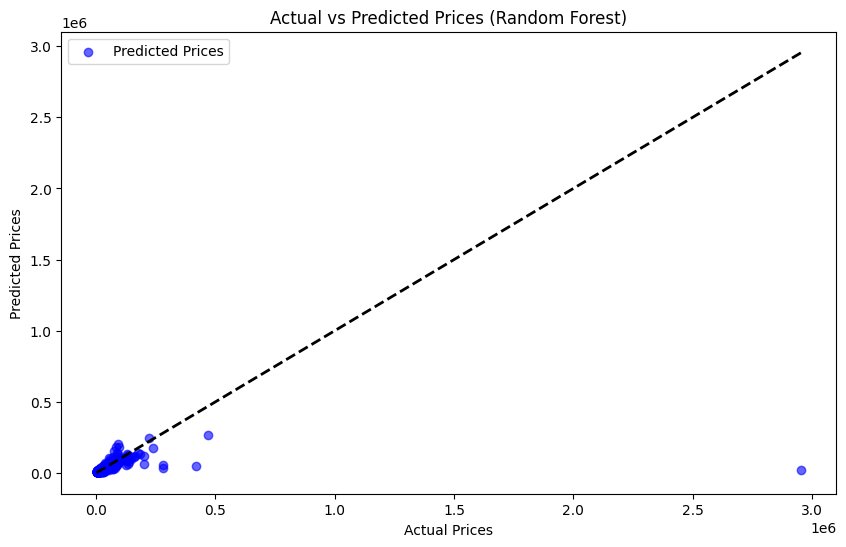

In [ ]:
#Scatter Plot of Actual vs Predicted Prices (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue', label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.legend()
plt.show()

In [ ]:
#Model Performance (R^2 Score)
r2_score = rf_model.score(X_test_scaled, y_test)
print(f"Random Forest R^2 Score: {r2_score:.2f}")



Random Forest R^2 Score: 0.06
